In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Matthew - Main User\Downloads\flights.csv")


C:\Users\Matthew - Main User\AppData\Local\Temp\ipykernel_4408\1509953681.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Matthew - Main User\Downloads\flights.csv")


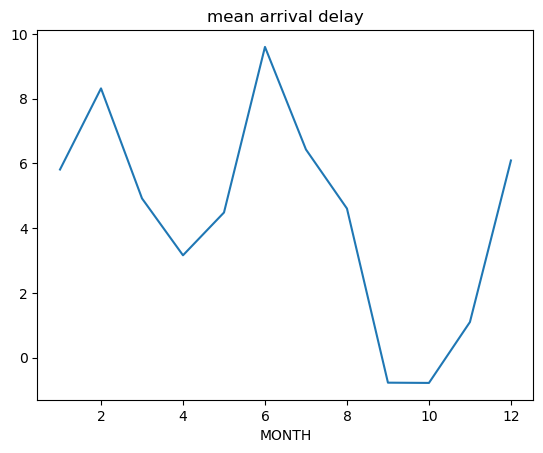

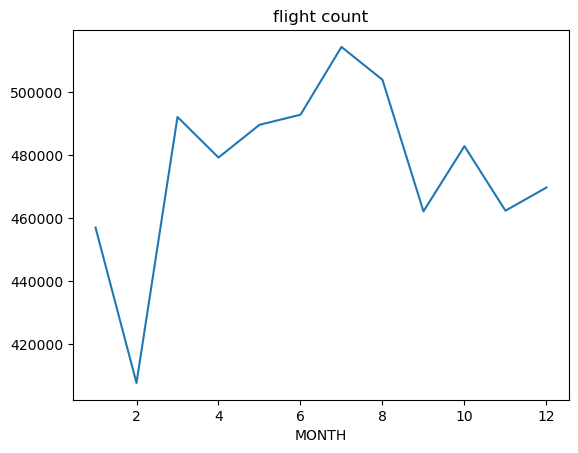

In [4]:
# Смотрим среднии значения задержек вылетов в месяце и видим что резкий скачок в июне, хотя, количество вылетов в этот месяце не самое высокое 
df.groupby('MONTH')['ARRIVAL_DELAY'].mean().plot()
plt.title("mean arrival delay")
plt.show()
df.groupby('MONTH')['ARRIVAL_DELAY'].count().plot()
plt.title("flight count")
plt.show()


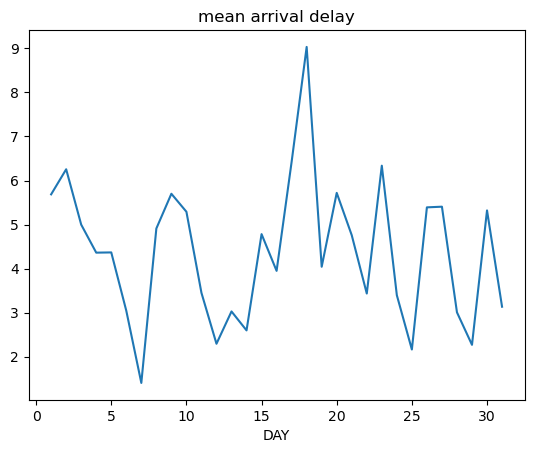

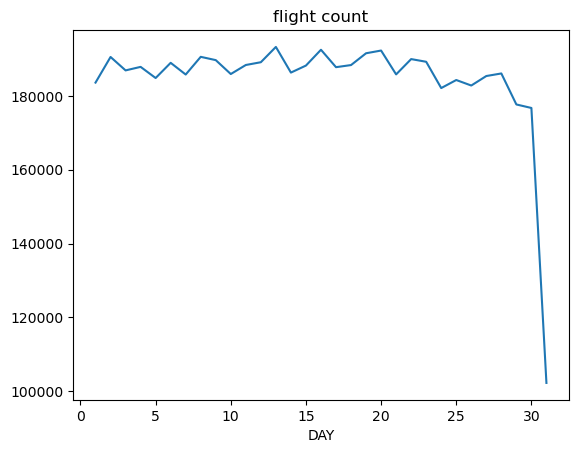

In [27]:
#Сравним графики задережк прилетов и количество рейсов в этот день
#Вывод: видно, что количество рейсов меняется не сильно в течение всего месяца, за исключением, 30 числа, в то время как у задержек идет серьезный рост 17 числа месяца
df.groupby('DAY')['ARRIVAL_DELAY'].mean().plot()
plt.title("mean arrival delay")
plt.show()
df.groupby('DAY')['ARRIVAL_DELAY'].count().plot()
plt.title("flight count")
plt.show()


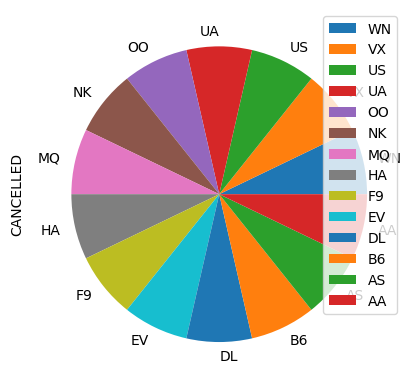

In [31]:
# Авиакомпании с наибольшим количеством отмененных рейсов
df.groupby('AIRLINE')['CANCELLED'].nunique().sort_values()[::-1].plot.pie()

plt.legend()

plt.show()

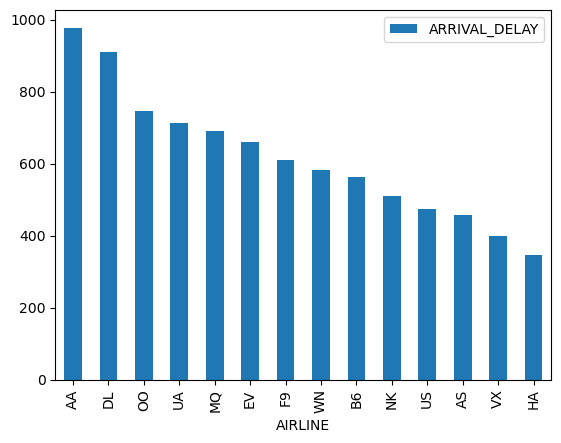

In [32]:
# Посмотрим на авиакомпании с наибольшей задержкой
#Исходя из этого и предыдущего графиков, можно сосатвить списко наиболее неблагонадежных команий:
# UA. OO, MQ
df.groupby('AIRLINE')['ARRIVAL_DELAY'].nunique().sort_values()[::-1].plot.bar()

plt.legend()

plt.show()

ORIGIN_AIRPORT
ATL      567
ORD      562
LAX      516
DFW      515
SFO      505
        ... 
13502      1
11097      1
11503      1
14222      1
13964      0
Name: DEPARTURE_DELAY, Length: 930, dtype: int64


<AxesSubplot:xlabel='ORIGIN_AIRPORT'>

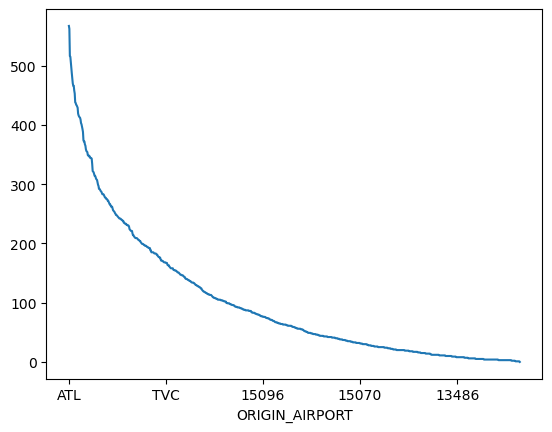

In [67]:
# Аэропорты вылета и наибольшая задержка
res = df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].nunique().sort_values()[::-1]
print(res)
res.plot()

DESTINATION_AIRPORT
DFW      828
ATL      741
ORD      732
DEN      620
LAX      608
        ... 
13459      1
14222      1
11097      1
10666      1
13964      0
Name: ARRIVAL_DELAY, Length: 930, dtype: int64


<AxesSubplot:xlabel='DESTINATION_AIRPORT'>

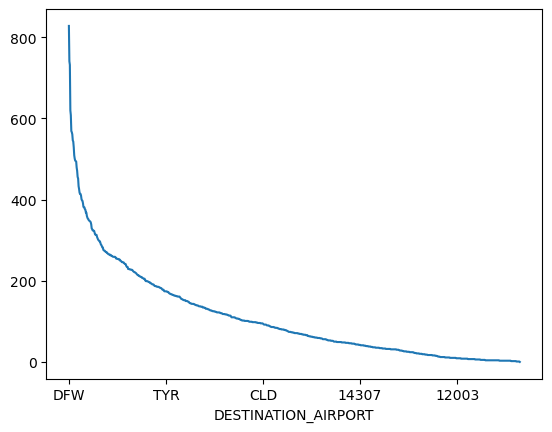

In [65]:
# Аэропорты вылета и наибольшая задержка
res = df.groupby('DESTINATION_AIRPORT')['ARRIVAL_DELAY'].nunique().sort_values()[::-1]
print(res)
res.plot()

In [ ]:
#Сравнивания полседние полученные данные, можно прийти к выводу, что серьзные проблемы есть в работах аэропортов:
# DFW, ORD, LAX, DEN

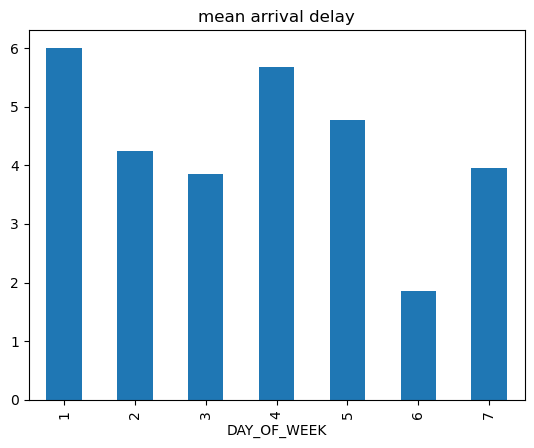

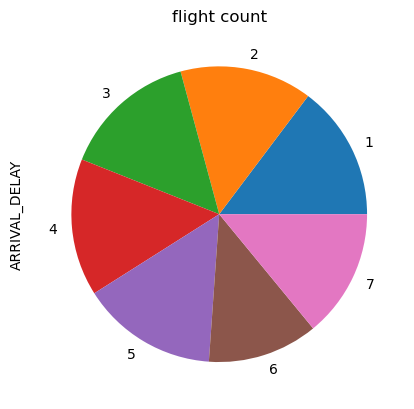

In [69]:
#Сравним графики задережк прилетов и количество рейсов в неокторый день недели
#Вывод: количесвто рейсов распрделено равномерно на неделе, за исключением, субботы, что закономерно отражается на графике 
#задержек. 
df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean().plot.bar()
plt.title("mean arrival delay")
plt.show()
df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].count().plot.pie()
plt.title("flight count")
plt.show()